<a href="https://colab.research.google.com/github/KazukiOtomo/Articles/blob/main/DS%E7%AC%AC2%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章　記述統計

##２－１　記述統計とは

**ポイント**<br>

・記述統計とは、平均値とか分散を算出・グラフ化したりすることで、データを把握する手法のことである。

<details><summary>**詳細はこちら**</summary>
<div>

 　**記述統計**　=　データの概要を把握するための*手法*(数値への要約・グラフによる可視化...) 

　**記述統計量**　=　記述統計量で求められた値(平均値、分散...)
  
  ``※データの内容を把握する「記述統計」に対して、データの性質を推測する「推測統計」という手法もある。``(詳細は4，5章)
</div>
</details>

##２－２　分析データ

**ポイント**

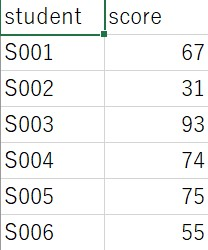

・csvファイルを読み込む際には、変数名があるかどうかで「header=TRUE or FALSE」を指定する。

・headで冒頭だけ表示できる。全体を表示させたければ、print()や、データフレームの変数名を書いてやればよい。

**サンプルコード**

In [ ]:
#あらかじめ、Slackで配布されたcsvデータをcolabに配置しよう！

sample <- read.csv("data_ch2.csv",header = TRUE)
head(sample)

<details><summary> **詳細はこちら** </summary>
<div>

”header”というのは，変数名を書いた"data_ch2.csv"の1行目のことです．<br>
1行目に変数名が書いてあるファイルを読み込む際には，”header=TRUE”と指定する必要があります．<br>もし，1行目に変数名がなく，**いきなりデータが書かれているようなファイルを読み込む場合は，<br>”header=FALSE”と指定します**．
</div>
</details>

##２－３　平均値・中央値・最頻値

**ポイント**

・平均：mean(DATA)

　→外れ値の影響を受けやすいので、データの特徴を捉えるのは難しい。

・中央値：median(DATA)

　→全体のデータの「中心」が求められるが、これもデータ全体の特徴を捉えているとは言えない。

・最頻値：which.max(table(DATA))

　→最も多くあらわれるデータのこと。


**平均値サンプルコード**

In [ ]:
#1回読み込めば十分なので、本当はセルを分けるべき
dat <- read.csv("data_ch2.csv",header = TRUE)
#-----------------------------------------------

# result = sum(dat$score) / nrow(dat)
mean(dat$score)
#62.05と出力されるはず

**中央値サンプルコード**

In [ ]:
median(dat$score)
#62.5と出力されるはず

<details><summary> **詳細はこちら** </summary>
<div>

・１,２,３,４,５の中央値

＝＞３

・１,２,３,４の中央値

＝＞(2 + 3) / 2 = 2.5

</div>
</details>



**最頻値サンプルコード**

In [ ]:
names(which.max(table(dat$score)))
# '63' と出力されるはず

<details><summary> **詳細はこちら** </summary>
<div>

Rには、最頻値を求める組み込み関数が存在しないので、組み合わせて実現する。

**table関数**：個々の点数を取った学習者を集計する。

  (例、10点：2人、15点：3人......)

**which.max関数**:最も多くあらわれる点数を特定する。

**names関数**：今回のnames属性「点数」の情報のみ取り出している。

</div>
</details>

**追記事項**

<details><summary> **文字列->数値の変換** </summary>
<div>

・names関数からの返り値は文字列として認識されている。<br>よって、求めた最頻値を別の計算に使う場合は、<br>as.numeric関数を用いて「文字列」から「数値」に変換する必要がある。
```r
name = names(which.max(table(dat$score)))
as.numeric(names)
```

</div>
</details>

<br>

<details><summary> **度数分布表の表示** </summary>
<div>

・以下のコードを実行すると、度数分布表を得ることができる。
```r
table(dat$score)
```

</div>
</details>



##２－４　最小値・最大値・範囲

**ポイント**

<br>

**min関数**:最小値のデータを求める

**max関数**:最大値のデータを求める

**range関数**:最小・最大値を同時に求める

**範囲**：(最大値)ー(最小値)


**サンプルコード**

In [ ]:
#100名の試験結果の最低点　出力：21
min(dat$score)

#100名の試験結果の最高点　出力：96
max(dat$score)

#最高点と最低点を同時に算出　出力：21・96
range(dat$score)

#試験結果の範囲　出力：76
max(dat$score) - min(dat$score)

##２－５　分散・標準偏差

**ポイント**

・分散(**不偏分散**)を求めるには、**var関数**を用いる。

・割る数がn-1である理由は、**標本分散を標本数で割ってしまうと、元の母集団の分散よりも小さくなりやすくなってしまう**という理由からだそう。詳しい解説は[こちら (高校数学の美しい物語)](https://manabitimes.jp/math/1035) 

・標準偏差(**不偏標本標準偏差**)を求めるには、**sd関数**を用いる。

・ここで求められる分散・標準偏差は、あくまで標本内のものであり、**母集団の代表値を推定する値である**ということに注意しなければいけない。


**サンプルコード**

In [ ]:
#100名の試験結果の分散 出力：283.320707070707
var(dat$score)

#100名の試験結果の標準偏差 出力：16.8321337105374
sd(dat$score)

##２－６　5数要約・要約統計量

**ポイント**

・5数要約とは、最大値・最小値・第1～第3四分位数の5つを指している。

・5数要約を求めるには、**quantile関数**を用いる。

・**summary関数**を使うと、5数要約と平均値を同時に求めることができる。

・**describe関数**を用いると、様々なパラメータを取得することができる。

**サンプルコード**

In [ ]:
#100名の試験結果の5数要約
quantile(dat$score)

In [ ]:
#5数要約と平均値を同時に算出する。
summary(dat$score)

In [ ]:
#パッケージのインストール
install.packages("psych",dependensies=TRUE)
#パッケージの読み込み
library("psych")

#様々なパラメータを取得することができる
describe(dat$score)

##２－７　標準得点・偏差値

**ポイント**

・標準得点＝{(個々のデータ)ー(平均値)} / 標準偏差

・scale関数を用いると、標準得点が求められる。

・よく用いられる偏差値は、標準得点を10倍して50を足した値を使っている。

＝＞平均点の偏差値は50

In [ ]:
#標準得点を求める
scale(dat$score)

In [ ]:
#データの偏差値を求める
((dat$score - mean(dat$score) )/ sd(dat$score)) * 10 + 50

##２－８　歪度・尖度

**ポイント**

・**歪度**：分布の非対称の度合い　**skew関数**

＝＞0より大きい：左側に偏った分布 / 0より小さい：右側に偏った分布

・**尖度**：分布の尖り具合　**kurtosi関数**

＝＞0より大きい：尖りが急で、裾の長い分布 / 0より小さい：緩やかで、裾の短い分布

In [ ]:
#　歪度 psychパッケージの利用
skew(dat$score)

#　尖度
kurtosi(dat$score)